In [ ]:
import os
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
def read_data(file_path):
    loss_list = []
    with open(file_path,'r') as f:
        for i, line in enumerate(f.readlines()):
            loss = line.strip('\n').split('\t')[0]
            loss_list.append(eval(format(eval(loss), '.2f')))

    return loss_list

In [ ]:
fig_path = './loss_figs'
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

In [ ]:
daagcn = read_data('./visualize/PEMS04/DAAGCN_PEMS04_val_loss.txt')
data_name = 'pems04'
# daagcn = read_data('./visualize/PEMS08/DAAGCN_PEMS08_val_loss.txt')
# data_name = 'pems08'

In [ ]:
epoch =  np.arange(0, 40, 1)
x_label = [i for i in range(1, 121, 1)]

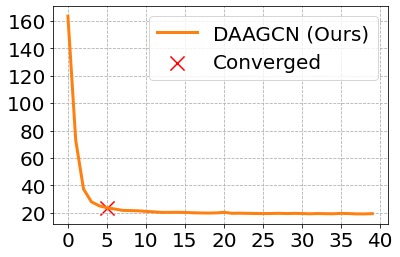

In [ ]:
fig, ax = plt.subplots()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xticks(epoch, x_label)  DAAGCN: FF7F0F; GT: 2AA02B
# ax.set_ylim(0.3, 0.7)
lns = ax.plot(epoch, daagcn[:40], '-', color="#FF7F0F", label = 'DAAGCN (Ours)', linewidth=3)
# plt.axvline(x=5, c="grey", ls="--", lw=2)
# plt.axvline(x=30, c="grey", ls="--", lw=2)
plt.scatter([5], [23.6030], marker='x', s=200, color="red", label="Converged")
plt.grid(linestyle='--')
plt.legend(fontsize=20, loc='upper right') # loc='upper left')
plt.savefig(os.path.join(fig_path, 'loss_{}.png'.format(data_name)), format='png', bbox_inches='tight', pad_inches=0.05, dpi=100)
plt.show()

In [11]:
import random

In [8]:
fig_path = 'pred_figs'
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

In [9]:
horizon =  np.arange(0, 12, 1)
x_label = [i for i in range(1, 13, 1)]

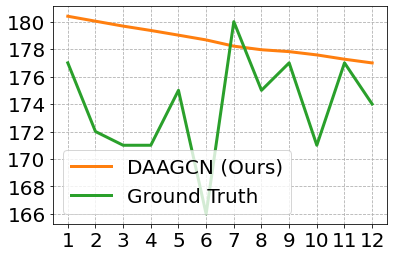

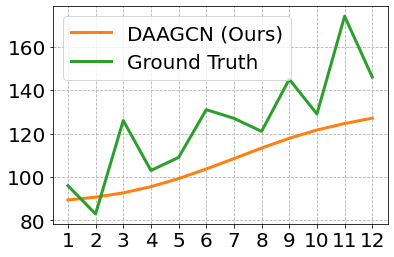

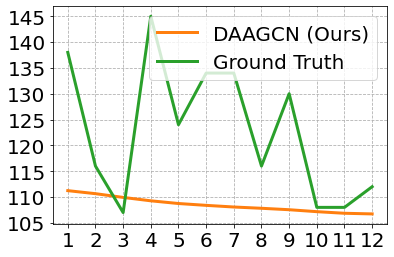

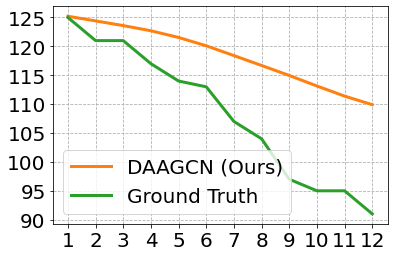

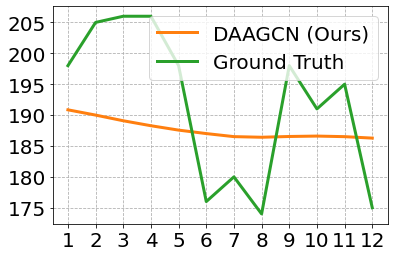

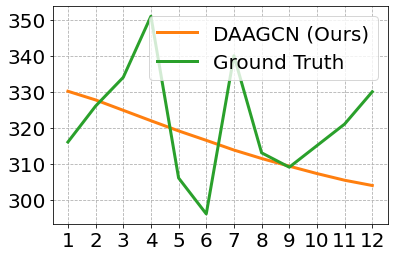

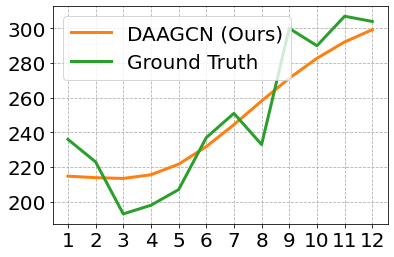

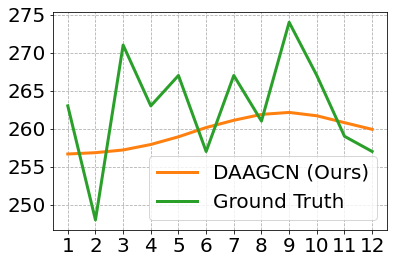

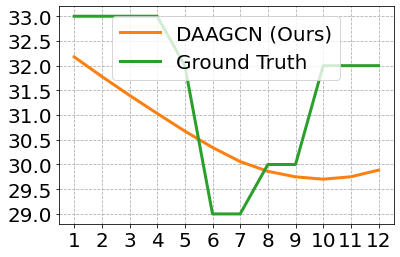

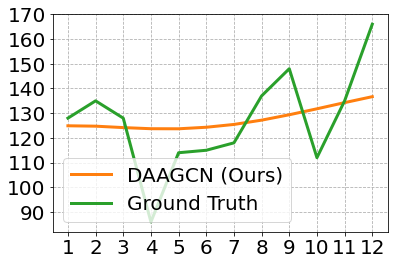

In [13]:
node_id = [i  for i in range(307)] # 307 for PEMS04; 170 for PEMS08
select_node = random.sample(node_id, 10)
for i in select_node:
    fig, ax = plt.subplots()
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xticks(horizon, x_label)  # DAAGCN: FF7F0F GT: 2AA02B
    
    daagcn = np.load('./visualize/PEMS04/DAAGCN_PEMS04_pred.npy')[i, :, i, 0]
    gt = np.load('./visualize/PEMS04/DAAGCN_PEMS04_true.npy')[i, :, i, 0]
    data_name = 'pems04_{}'.format(i)

    # daagcn = np.load('./visualize/PEMS08/DAAGCN_PEMS08_pred.npy')[i, :, i, 0]
    # gt = np.load('./visualize/PEMS08/DAAGCN_PEMS08_true.npy')[i, :, i, 0]
    # data_name = 'pems08_{}'.format(i)

    lns1 = ax.plot(horizon, daagcn, '-', color="#FF7F0F", label = 'DAAGCN (Ours)', linewidth=3)
    lns2 = ax.plot(horizon, gt, '-', color="#2AA02B", label = 'Ground Truth', linewidth=3)    
    plt.grid(linestyle='--')
    plt.legend(fontsize=20) # loc='upper left'
    plt.savefig(os.path.join(fig_path, 'pred_{}.png'.format(data_name)), format='png', bbox_inches='tight', pad_inches=0.05, dpi=100)
    plt.show()